In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import plot_confusion_matrix, classification_report, roc_curve, roc_auc_score


In [2]:
df=pd.read_csv("winequality.csv")

In [3]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1319 entries, 0 to 1318
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1319 non-null   float64
 1   volatile acidity      1319 non-null   float64
 2   citric acid           1319 non-null   float64
 3   residual sugar        1319 non-null   float64
 4   chlorides             1319 non-null   float64
 5   free sulfur dioxide   1319 non-null   float64
 6   total sulfur dioxide  1319 non-null   float64
 7   density               1319 non-null   float64
 8   pH                    1319 non-null   float64
 9   sulphates             1319 non-null   float64
 10  alcohol               1319 non-null   float64
 11  quality               1319 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 123.8 KB


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1319.0,8.254284,1.682935,4.70000,7.1000,7.8000,9.1000,15.90000
volatile acidity,1319.0,0.538560,0.167679,0.16000,0.4100,0.5400,0.6400,1.33000
citric acid,1319.0,0.258264,0.187995,0.00000,0.0900,0.2400,0.4000,0.79000
residual sugar,1319.0,2.503867,1.399633,0.90000,1.9000,2.2000,2.6000,15.50000
chlorides,1319.0,0.088973,0.047538,0.03400,0.0710,0.0800,0.0910,0.61100
free sulfur dioxide,1319.0,16.368461,10.492335,1.00000,8.0000,14.0000,22.0000,72.00000
total sulfur dioxide,1319.0,48.946929,32.714030,6.00000,24.0000,40.0000,65.0000,165.00000
density,1319.0,0.996867,0.001815,0.99007,0.9958,0.9968,0.9979,1.00369
pH,1319.0,3.311296,0.152345,2.86000,3.2100,3.3100,3.4000,4.01000
sulphates,1319.0,0.647263,0.167334,0.37000,0.5400,0.6100,0.7000,1.98000


In [6]:
df.quality.value_counts()

5    681
6    638
Name: quality, dtype: int64

In [7]:
df.quality.value_counts(normalize=True)

5    0.5163
6    0.4837
Name: quality, dtype: float64

### EDA

<AxesSubplot:xlabel='alcohol', ylabel='Count'>

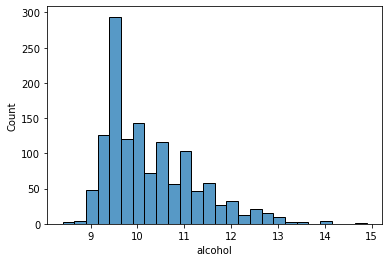

In [8]:
sns.histplot(x='alcohol', data =df)

<AxesSubplot:xlabel='alcohol'>

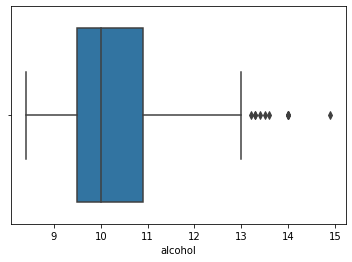

In [9]:
sns.boxplot(x='alcohol', data =df)

<AxesSubplot:xlabel='residual sugar', ylabel='Count'>

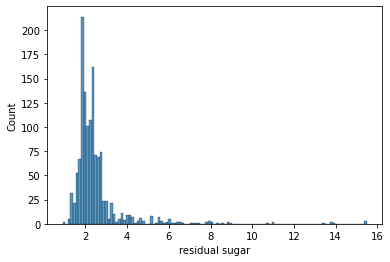

In [10]:
sns.histplot(x='residual sugar', data=df)

<AxesSubplot:xlabel='residual sugar'>

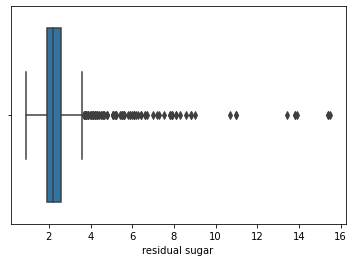

In [11]:
sns.boxplot(x='residual sugar', data=df)

In [12]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

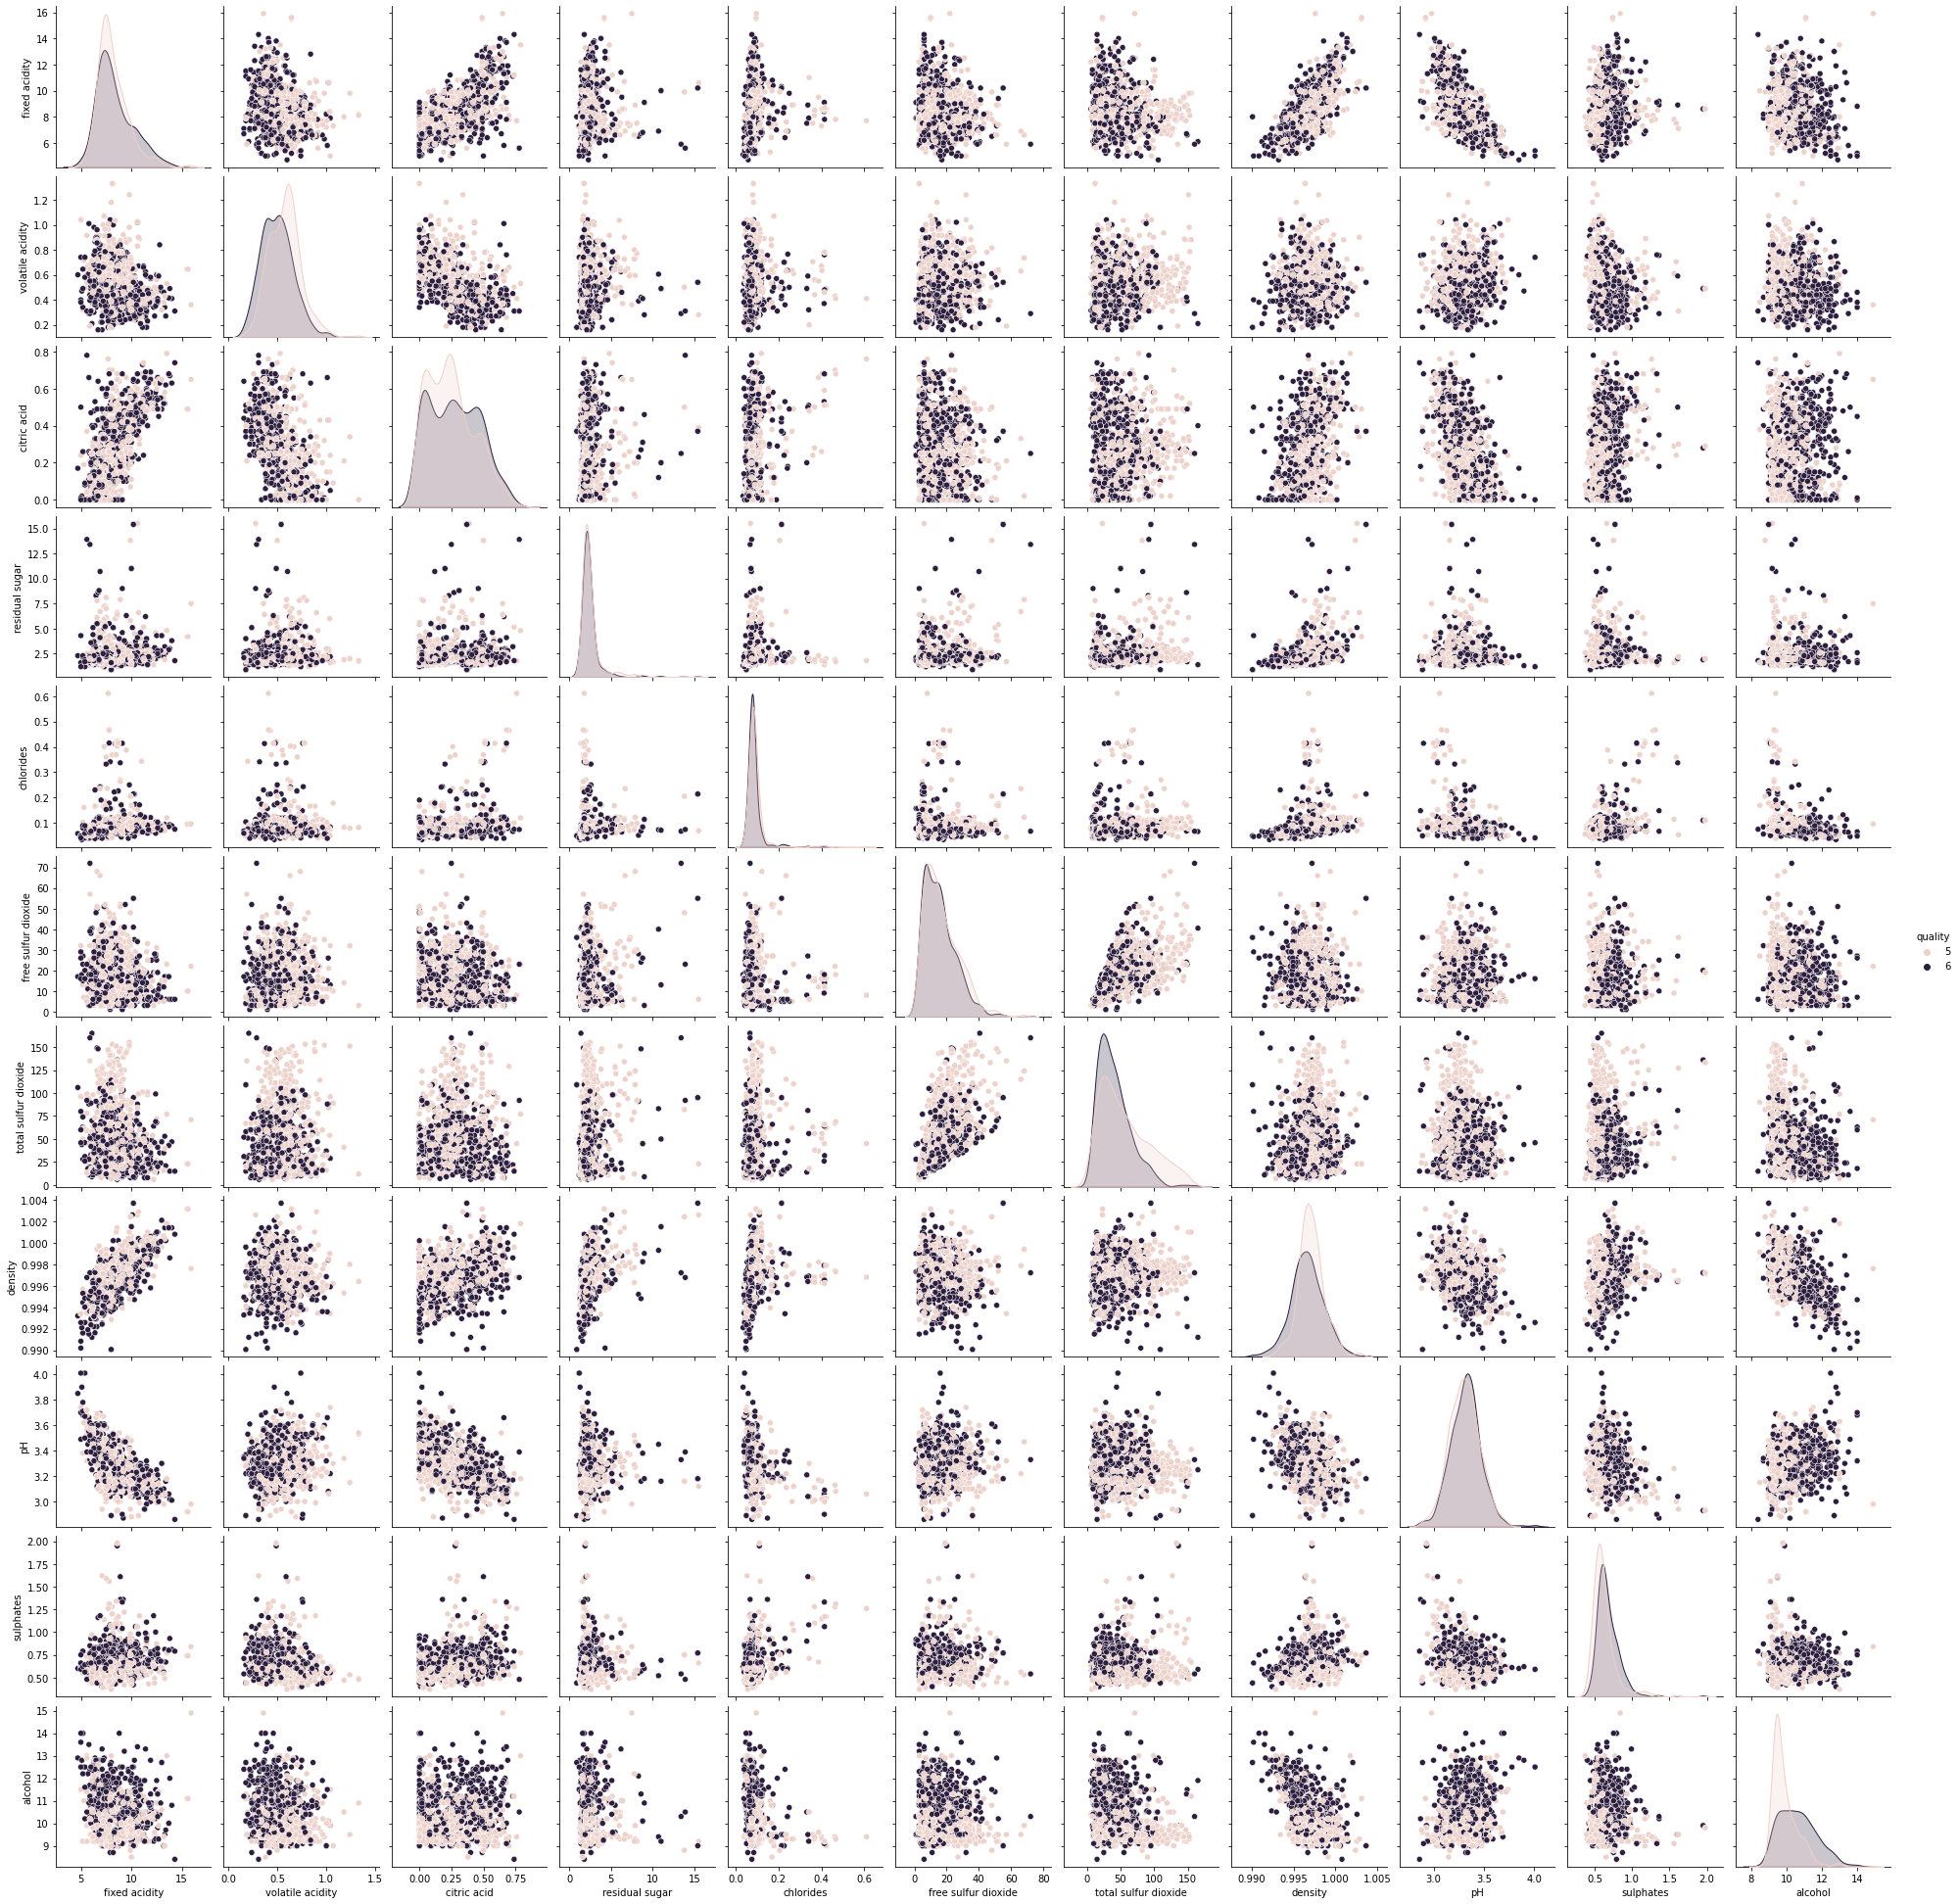

In [13]:
sns.pairplot(vars=['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 
                   'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol'], data=df, 
             hue = 'quality')

### Decision Tree Model

In [14]:
X = df.drop(columns = 'quality')
y = df['quality']

In [15]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size = 0.30, random_state= 355)

In [16]:
x_train.shape

(923, 11)

In [17]:
y_train.value_counts()

5    469
6    454
Name: quality, dtype: int64

In [18]:
clf = DecisionTreeClassifier()
clf.fit(x_train,y_train)

DecisionTreeClassifier()

In [19]:
from sklearn import tree

train_char_label = ['No', 'Yes']
ld_Tree_File = open('ld_Tree_File.dot','w')
dot_data = tree.export_graphviz(clf, 
                                out_file=ld_Tree_File, 
                                feature_names = list(x_train), 
                                class_names = list(train_char_label))

ld_Tree_File.close()

The above code will save a .dot file in your working directory.  
WebGraphviz is Graphviz in the Browser.   
Copy paste the contents of the file into the link below to get the visualization     
http://webgraphviz.com/

In [20]:
y_pred_train = clf.predict(x_train)
y_pred_test = clf.predict(x_test)

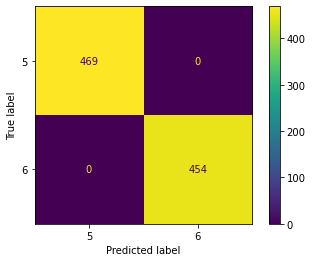

In [21]:
plot_confusion_matrix(clf, x_train, y_train)

In [22]:
print(classification_report(y_train, y_pred_train))

              precision    recall  f1-score   support

           5       1.00      1.00      1.00       469
           6       1.00      1.00      1.00       454

    accuracy                           1.00       923
   macro avg       1.00      1.00      1.00       923
weighted avg       1.00      1.00      1.00       923



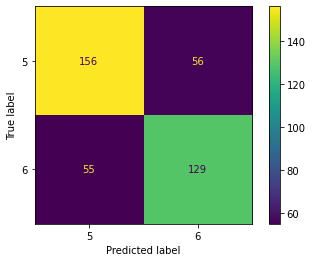

In [23]:
plot_confusion_matrix(clf, x_test, y_test)

In [24]:
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           5       0.74      0.74      0.74       212
           6       0.70      0.70      0.70       184

    accuracy                           0.72       396
   macro avg       0.72      0.72      0.72       396
weighted avg       0.72      0.72      0.72       396



In [25]:
clf1 = DecisionTreeClassifier(max_depth=7, min_samples_leaf=24, min_samples_split=72, random_state=123)
clf1.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=7, min_samples_leaf=24, min_samples_split=72,
                       random_state=123)

In [26]:
from sklearn import tree

train_char_label = ['No', 'Yes']
ld_Tree_File1 = open('ld_Tree_File1.dot','w')
dot_data = tree.export_graphviz(clf1, 
                                out_file=ld_Tree_File1, 
                                feature_names = list(x_train), 
                                class_names = list(train_char_label))

ld_Tree_File1.close()

In [27]:
y_pred_train1 = clf1.predict(x_train)
y_pred_test1 = clf1.predict(x_test)

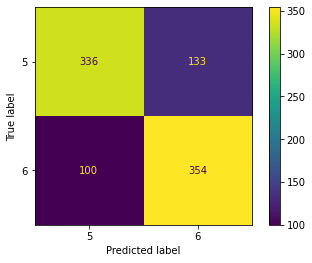

In [28]:
plot_confusion_matrix(clf1, x_train, y_train)

In [29]:
print(classification_report(y_train, y_pred_train1))

              precision    recall  f1-score   support

           5       0.77      0.72      0.74       469
           6       0.73      0.78      0.75       454

    accuracy                           0.75       923
   macro avg       0.75      0.75      0.75       923
weighted avg       0.75      0.75      0.75       923



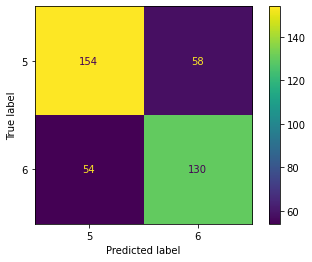

In [30]:
plot_confusion_matrix(clf1, x_test, y_test)

In [31]:
print(classification_report(y_test, y_pred_test1))

              precision    recall  f1-score   support

           5       0.74      0.73      0.73       212
           6       0.69      0.71      0.70       184

    accuracy                           0.72       396
   macro avg       0.72      0.72      0.72       396
weighted avg       0.72      0.72      0.72       396



In [32]:
print (pd.DataFrame(clf1.feature_importances_, columns = ["Imp"], 
                    index = x_train.columns).sort_values('Imp',ascending=False))


                           Imp
alcohol               0.484053
sulphates             0.144516
total sulfur dioxide  0.111311
density               0.074739
pH                    0.053683
chlorides             0.039445
volatile acidity      0.034780
free sulfur dioxide   0.032540
citric acid           0.017568
fixed acidity         0.005545
residual sugar        0.001820


## Random Forest

In [33]:
from sklearn.ensemble import RandomForestClassifier

In [34]:
rfc = RandomForestClassifier(n_estimators = 101, random_state = 42)

In [66]:
rfc1 = RandomForestClassifier(n_estimators=201, random_state= 42, oob_score= True)

In [67]:
rfc1.fit(x_train,y_train)

RandomForestClassifier(n_estimators=201, oob_score=True, random_state=42)

In [68]:
rfc1.oob_score_

0.7843986998916577

In [35]:
rfc.fit(x_train,y_train)

RandomForestClassifier(n_estimators=101, random_state=42)

In [36]:
y_pred_train_rfc = rfc.predict(x_train)
y_pred_test_rfc = rfc.predict(x_test)

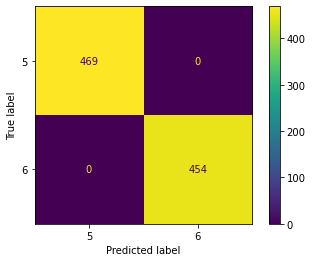

In [37]:
plot_confusion_matrix(rfc, x_train, y_train)

In [38]:
print(classification_report(y_train, y_pred_train_rfc))

              precision    recall  f1-score   support

           5       1.00      1.00      1.00       469
           6       1.00      1.00      1.00       454

    accuracy                           1.00       923
   macro avg       1.00      1.00      1.00       923
weighted avg       1.00      1.00      1.00       923



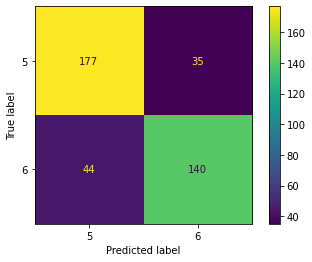

In [39]:
plot_confusion_matrix(rfc, x_test, y_test)

In [40]:
print(classification_report(y_test, y_pred_test_rfc))

              precision    recall  f1-score   support

           5       0.80      0.83      0.82       212
           6       0.80      0.76      0.78       184

    accuracy                           0.80       396
   macro avg       0.80      0.80      0.80       396
weighted avg       0.80      0.80      0.80       396



In [41]:
rfc1 = RandomForestClassifier(n_estimators = 101, max_depth=8, max_features=6, min_samples_leaf=16, min_samples_split= 60,
                              random_state = 123)

In [42]:
rfc1.fit(x_train,y_train)

RandomForestClassifier(max_depth=8, max_features=6, min_samples_leaf=16,
                       min_samples_split=60, n_estimators=101,
                       random_state=123)

In [43]:
y_pred_train_rfc1 = rfc1.predict(x_train)
y_pred_test_rfc1 = rfc1.predict(x_test)

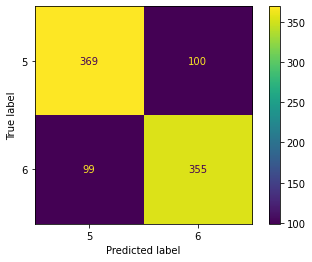

In [44]:
plot_confusion_matrix(rfc1, x_train, y_train)

In [45]:
print(classification_report(y_train, y_pred_train_rfc1))

              precision    recall  f1-score   support

           5       0.79      0.79      0.79       469
           6       0.78      0.78      0.78       454

    accuracy                           0.78       923
   macro avg       0.78      0.78      0.78       923
weighted avg       0.78      0.78      0.78       923



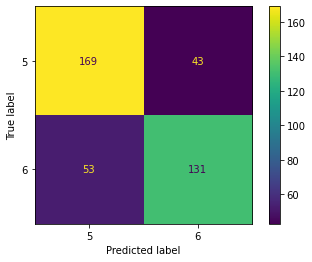

In [46]:
plot_confusion_matrix(rfc1, x_test, y_test)

In [47]:
print(classification_report(y_test, y_pred_test_rfc1))

              precision    recall  f1-score   support

           5       0.76      0.80      0.78       212
           6       0.75      0.71      0.73       184

    accuracy                           0.76       396
   macro avg       0.76      0.75      0.76       396
weighted avg       0.76      0.76      0.76       396



In [48]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [8,9,10],
    'max_features': [5,6],
    'min_samples_leaf': [14,16,18],
    'min_samples_split': [45,50,60,70],  
    'n_estimators': [101, 201]
}

rfcl = RandomForestClassifier()

grid_search = GridSearchCV(estimator = rfcl, param_grid = param_grid, cv = 5)

In [49]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [8, 9, 10], 'max_features': [5, 6],
                         'min_samples_leaf': [14, 16, 18],
                         'min_samples_split': [45, 50, 60, 70],
                         'n_estimators': [101, 201]})

In [50]:
grid_search.best_params_

{'max_depth': 10,
 'max_features': 5,
 'min_samples_leaf': 14,
 'min_samples_split': 45,
 'n_estimators': 101}

{'max_depth': 10,
 'max_features': 5,
 'min_samples_leaf': 14,
 'min_samples_split': 45,
 'n_estimators': 101}

In [51]:
best_model = grid_search.best_estimator_

In [52]:
y_pred_train_rfc2 = best_model.predict(x_train)
y_pred_test_rfc2 = best_model.predict(x_test)

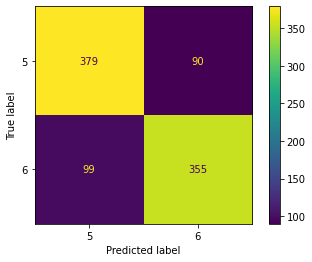

In [53]:
plot_confusion_matrix(best_model, x_train, y_train)

In [54]:
print(classification_report(y_train, y_pred_train_rfc2))

              precision    recall  f1-score   support

           5       0.79      0.81      0.80       469
           6       0.80      0.78      0.79       454

    accuracy                           0.80       923
   macro avg       0.80      0.80      0.80       923
weighted avg       0.80      0.80      0.80       923



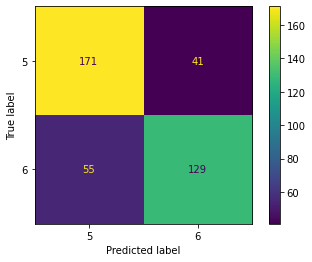

In [55]:
plot_confusion_matrix(best_model, x_test, y_test)

In [56]:
print(classification_report(y_test, y_pred_test_rfc2))

              precision    recall  f1-score   support

           5       0.76      0.81      0.78       212
           6       0.76      0.70      0.73       184

    accuracy                           0.76       396
   macro avg       0.76      0.75      0.75       396
weighted avg       0.76      0.76      0.76       396

